In [3]:
# Importing required libraries
import numpy as np # for numeric operation
import pandas as pd # load and preprocess data

# kagglehub to download data directly from Kaggle
import kagglehub

# os for file handling
import os

# shutil to cut/copy the file to current directry
import shutil

# pickle library to save and load the model for productionalization
import pickle

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# to load the output on Jupyter Notebook
%matplotlib inline

# library to split data into train and test sample
from sklearn.model_selection import train_test_split

# importing library for LinearRegression
from sklearn.linear_model import LinearRegression

# importing evaluation metrices to check the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display the output as markdown format
from IPython.display import Markdown

Matplotlib is building the font cache; this may take a moment.


In [7]:
# Download latest version
kaggle_path = kagglehub.dataset_download("himanshunakrani/student-study-hours")

print("Path to dataset files:", kaggle_path)

100%|██████████| 796/796 [00:00<00:00, 557kB/s]

Extracting files...
Path to dataset files: C:\Users\Smit\.cache\kagglehub\datasets\himanshunakrani\student-study-hours\versions\3


In [5]:
# creating directory to store the downloaded files

# get the current working directory
cwd = os.getcwd()

dataset_dir = 'dataset'

dataset_path = os.path.join(cwd, dataset_dir)

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

In [8]:
# Input data files are available in the read-only "../input/" directory
# The below code will list all the files available there
for dirname, _, filenames in os.walk(kaggle_path):
    for filename in filenames:
        print(f"dirname: {dirname} | filename: {filename}")
        source_path = os.path.join(dirname, filename)
        dest_path = os.path.join(dataset_path, filename)
        shutil.move(source_path, dest_path)
        print(f"Source File: {source_path} | Moved to: {dest_path}")


dirname: C:\Users\Smit\.cache\kagglehub\datasets\himanshunakrani\student-study-hours\versions\3 | filename: score.csv
Source File: C:\Users\Smit\.cache\kagglehub\datasets\himanshunakrani\student-study-hours\versions\3\score.csv | Moved to: c:\Users\Smit\Desktop\Temp-Imp\AIML\Projects\ml-projects\student-performance-predictor\dataset\score.csv
dirname: C:\Users\Smit\.cache\kagglehub\datasets\himanshunakrani\student-study-hours\versions\3 | filename: score_updated.csv
Source File: C:\Users\Smit\.cache\kagglehub\datasets\himanshunakrani\student-study-hours\versions\3\score_updated.csv | Moved to: c:\Users\Smit\Desktop\Temp-Imp\AIML\Projects\ml-projects\student-performance-predictor\dataset\score_updated.csv


In [9]:
df_score = pd.read_csv(os.path.join(dataset_path, 'score.csv'))
df_score_updated = pd.read_csv(os.path.join(dataset_path, 'score_updated.csv'))

In [10]:
df_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df_score_updated.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
df_score.shape

(25, 2)

In [13]:
df_score_updated.shape

(96, 2)

In [14]:
df = pd.concat([df_score, df_score_updated], axis=0)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
df.shape

(121, 2)

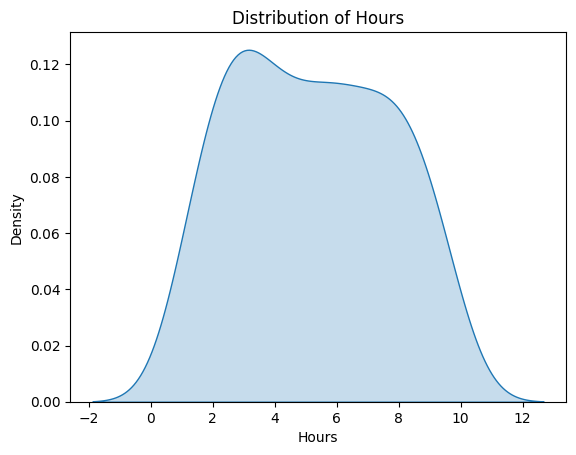

In [16]:
sns.kdeplot(df['Hours'], fill=True)
plt.title("Distribution of Hours");

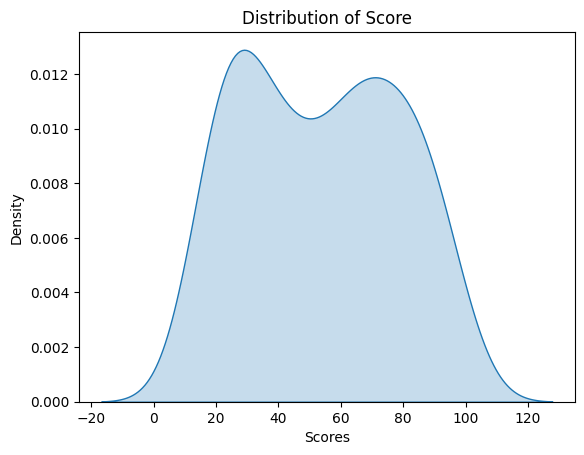

In [17]:
sns.kdeplot(df['Scores'], fill=True)
plt.title("Distribution of Score");

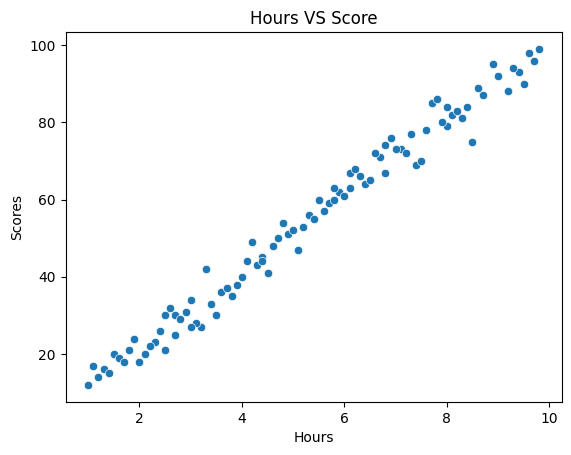

In [18]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title("Hours VS Score");

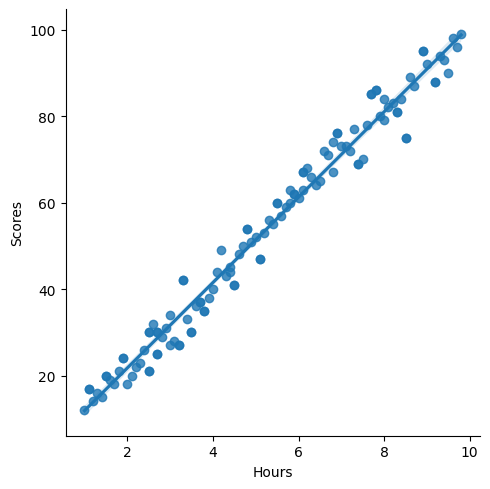

In [19]:
sns.lmplot(x="Hours", y="Scores", data=df);

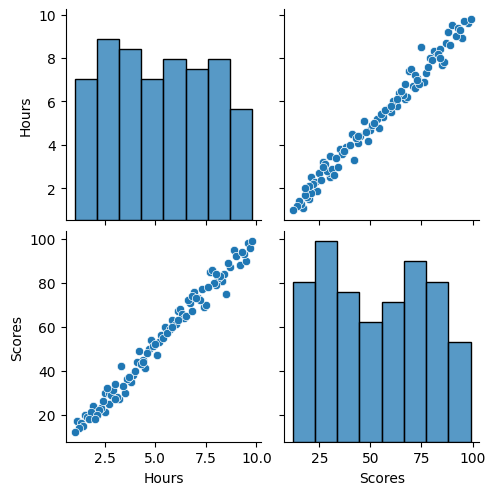

In [20]:
sns.pairplot(df);

In [21]:
df.duplicated().sum()

np.int64(26)

In [22]:
df_student_report = df.drop_duplicates(keep='first')

In [23]:
df_student_report.shape

(95, 2)

In [24]:
df_student_report.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
X = df_student_report.iloc[:, :-1].values
y = df_student_report.iloc[:, -1].values

# X = df_student_report["Hours"].values
# y = df_student_report["Scores"].values

# X = df_student_report.drop("Scores", axis=1)
# y =  df_student_report["Scores"].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [27]:
print(f"Size of: X_train = {len(X_train)}, X_test = {len(X_test)}, y_train = {len(y_train)}, y_test = {len(y_test)}")

Size of: X_train = 76, X_test = 19, y_train = 76, y_test = 19


In [28]:
# initiating the object of LinearRegression
student_performance_model_lr = LinearRegression()

In [29]:
# Train the data
student_performance_model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Save model into local directory

In [30]:
# creating directory to store the model
model_dir = 'models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# File name of the model
model_file_lr = 'student_performance_model_lr.pkl'

model_file_path = os.path.join(cwd, model_dir, model_file_lr)

# save the model into the directory using pickle dump function
pickle.dump(student_performance_model_lr, open(model_file_path, 'wb'))

In [31]:
# predicting on train data
y_train_pred = student_performance_model_lr.predict(X_train)

In [32]:
# predicting on test data
y_test_pred = student_performance_model_lr.predict(X_test)

In [33]:
print(f"Coefficient: {student_performance_model_lr.coef_}")
print(f"Intercept: {student_performance_model_lr.intercept_}")

Coefficient: [9.79396534]
Intercept: 2.2865151946856344


In [34]:
print(f"Train Score: {student_performance_model_lr.score(X_train, y_train)}\nTest Score: {student_performance_model_lr.score(X_test, y_test)}")

Train Score: 0.9801463049710261
Test Score: 0.9848081924656642


In [35]:
# performance metrices

# Mean Absolute Error
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Root Mean Square Error
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# R-squared / R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Adjusted R-squared
# formula: adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) | r2: R-square | n: Number of datapoints (rows) | p: number of features(columns)
train_n = X_train.shape[0]
test_n = X_test.shape[0]
p = X.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - p - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - p - 1)

# Output text
table_style = """<style>
      table {
        width: 100%;
        max-width: 750px;
      }
    </style>"""
output_performance_metrics = f"""
{table_style}
# Model Evaluation Metrix

| Metrics | Train Score | Test Score |
|:-----|-----:|-----:|
| **Mean Absolute Error** | {train_mae:.3f} | {test_mae:.3f} |
| **Mean Squared Error** | {train_mse:.3f} | {test_mse:.3f} |
| **Root Mean Square Error** | {train_rmse:.6f} | {test_rmse:.6f} |
| **R-squared / R2 Score** | {train_r2:.3f} | {test_r2:.3f} |
| **Adjusted R-squared** | {train_adjusted_r2:.4f} | {test_adjusted_r2:.4f} |

"""
display(Markdown(output_performance_metrics))


<style>
      table {
        width: 100%;
        max-width: 750px;
      }
    </style>
# Model Evaluation Metrix

| Metrics | Train Score | Test Score |
|:-----|-----:|-----:|
| **Mean Absolute Error** | 2.728 | 2.295 |
| **Mean Squared Error** | 12.267 | 9.583 |
| **Root Mean Square Error** | 3.502374 | 3.095703 |
| **R-squared / R2 Score** | 0.980 | 0.985 |
| **Adjusted R-squared** | 0.9799 | 0.9839 |



In [36]:
df_train_actual_vs_pred = pd.DataFrame({'Hours': X_train.reshape(len(X_train)), 'Actual_Scores': y_train, 'Predicted_Scores': y_train_pred})
df_train_actual_vs_pred.head()

,Hours,Actual_Scores,Predicted_Scores
0,5.3,56,54.194532
1,3.6,36,37.544790
2,3.0,27,31.668411
3,7.4,69,74.761859
4,7.0,73,70.844273


In [37]:
df_train_actual_vs_pred.tail()

,Hours,Actual_Scores,Predicted_Scores
71,1.2,14,14.039274
72,2.7,25,28.730222
73,8.7,87,87.494014
74,4.5,41,46.359359
75,6.3,66,63.988497


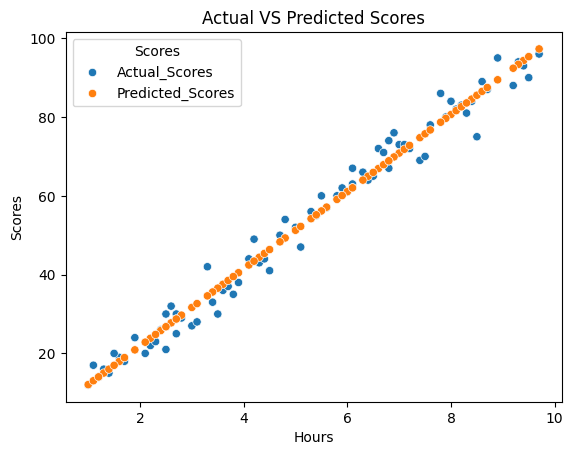

In [38]:
# sns.scatterplot(x=df_train_actual_vs_pred['Hours'], y=df_train_actual_vs_pred['Scores'])

# Melt the DataFrame to long-form
df_melted = df_train_actual_vs_pred.melt(id_vars=['Hours'], var_name='y_variable', value_name='y_value')

# Create the scatter plot
sns.scatterplot(data=df_melted, x='Hours', y='y_value', hue='y_variable')

# Add labels and title for clarity
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Actual VS Predicted Scores')
plt.legend(title='Scores')

plt.show()

## Load saved model into session

In [2]:
# run this cell to freshly load the model from saved location
# if above cells run in the same session then no need to run this cell

# loading basic libraries required to load and run the model
# os for file handling
import os
# pickle library to load the saved model
import pickle

import numpy as np # for numeric operation

# get the current working directory
cwd = os.getcwd()

model_dir = 'models'

# File name of the model
model_file_lr = 'student_performance_model_lr.pkl'

model_file_path = os.path.join(cwd, model_dir, model_file_lr)

# load the saved model
student_performance_model_lr = pickle.load(open(model_file_path, 'rb'))
student_performance_model_lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
print(f"Coefficient: {student_performance_model_lr.coef_}")
print(f"Intercept: {student_performance_model_lr.intercept_}")

Coefficient: [9.79396534]
Intercept: 2.2865151946856344


In [4]:
# run test case
user_study_hours = int(input("Enter the hours of study to predict expected score: "))
test_case = np.array([[user_study_hours]])
test_case_pred = student_performance_model_lr.predict(test_case)
print(f"Predicted score is: {test_case_pred[0]} \nif you study {user_study_hours} hours")

Predicted score is: 80.63823795011807 
if you study 8 hours
